In [38]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time
import sys

In [39]:
mnist_train = torchvision.datasets.FashionMNIST(root=r'../data', train=True, download=False, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root=r'../data', train=False, download=False, transform=transforms.ToTensor())

In [40]:
print(type(mnist_train))
print(len(mnist_train), len(mnist_test))

torchvision.datasets.mnist.FashionMNIST
60000 10000


In [41]:
feature, label = mnist_train[0]
print(feature.shape, label)  # Channel x Height x Width

torch.Size([1, 28, 28]) 9


In [42]:
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

def show_fashion_mnist(images, labels):

    _, figs = plt.subplots(1, len(images), figsize=(12, 12))
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.view((28, 28)).numpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()

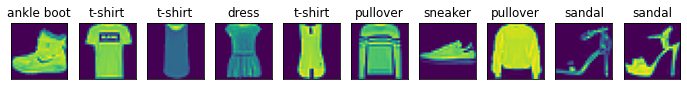

In [43]:
X, y = [], []
for i in range(10):
    X.append(mnist_train[i][0])
    y.append(mnist_train[i][1])
show_fashion_mnist(X, get_fashion_mnist_labels(y))

In [44]:
batch_size = 256
if sys.platform.startswith('win'):
    num_workers = 0  # 0表示不用额外的进程来加速读取数据
else:
    num_workers = 4

print("num_workers:{}".format(num_workers))
train_iter = torch.utils.data.DataLoader(mnist_train,
                                         batch_size=batch_size,
                                         shuffle=True,
                                         num_workers=num_workers)
test_iter = torch.utils.data.DataLoader(mnist_test,
                                        batch_size=batch_size,
                                        shuffle=False,
                                        num_workers=num_workers)


num_workers:0


In [45]:
start = time.time()
for X, y in train_iter:
    continue
print('%.2f sec' % (time.time() - start))

3.41 sec
